#### Описание данных
##### Резюме общего социального обследования, 1972-2012 годы

С 1972 года Общее социальное исследование (GSS) отслеживает изменения в обществе и изучает растущую сложность американского общества. GSS стремится собирать данные о современном американском обществе для мониторинга и объяснения тенденций и констант в подходах, поведении и атрибутах; изучить структуру и функционирование общества в целом, а также роль соответствующих подгрупп; сравнить Соединенные Штаты с другими обществами, с тем чтобы поставить американское общество в сравнительную перспективу и разработать межнациональные модели человеческого общества; и сделать высококачественные данные доступными для ученых, студентов, политиков и других лиц с минимальными затратами и ожиданиями.

Вопросы GSS охватывают широкий круг вопросов, включая приоритеты национальных расходов, использование марихуаны, преступность и наказание, расовые отношения, качество жизни, доверие к учреждениям и сексуальное поведение.

Данные состоятся из много переменных, о которых можно больше узнать в файле [gss.html](gss.html)

##### Оригинал на английском языке:
##### Abstract for the General Social Survey Cumulative File, 1972-2012

[Excerpted from the GSS project description]

Since 1972, the General Social Survey (GSS) has been monitoring societal change and studying the growing complexity of American society. The GSS aims to gather data on contemporary American society in order to monitor and explain trends and constants in attitudes, behaviors, and attributes; to examine the structure and functioning of society in general as well as the role played by relevant subgroups; to compare the United States to other societies in order to place American society in comparative perspective and develop cross-national models of human society; and to make high-quality data easily accessible to scholars, students, policy makers, and others, with minimal cost and waiting.

GSS questions cover a diverse range of issues including national spending priorities, marijuana use, crime and punishment, race relations, quality of life, confidence in institutions, and sexual behavior.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import operator
%matplotlib inline

In [2]:
data = pd.read_csv('./gss.csv', engine = 'python')
# Сразу бросим порядковые числа в первом столбце
data = data.drop(data.columns[0], axis=1)
orig_data = data

In [3]:
type(data)

pandas.core.frame.DataFrame

Посмотрим как выглядят данные:

In [4]:
data.head()

,caseid,year,age,sex,race,hispanic,uscitzn,educ,paeduc,maeduc,...,news,tvhours,racdif1,racdif2,racdif3,racdif4,helppoor,helpnot,helpsick,helpblk
0,1,1972,23.0,Female,White,NaN,NaN,16.0,10.0,NaN,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1972,70.0,Male,White,NaN,NaN,10.0,8.0,8.0,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1972,48.0,Female,White,NaN,NaN,12.0,8.0,8.0,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1972,27.0,Female,White,NaN,NaN,17.0,16.0,12.0,...,Once A Week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1972,61.0,Female,White,NaN,NaN,12.0,8.0,8.0,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.tail()

,caseid,year,age,sex,race,hispanic,uscitzn,educ,paeduc,maeduc,...,news,tvhours,racdif1,racdif2,racdif3,racdif4,helppoor,helpnot,helpsick,helpblk
57056,57057,2012,61.0,Female,Other,Not Hispanic,NaN,16.0,12.0,12.0,...,Few Times A Week,3.0,No,Yes,No,Yes,Agree With Both,Govt Does Too Much,Govt Should Help,No Special Treatment
57057,57058,2012,53.0,Female,Other,Not Hispanic,NaN,13.0,NaN,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Agree With Both,Agree With Both,Govt Should Help,No Special Treatment
57058,57059,2012,48.0,Male,White,"Mexican, Mexican American, Chicano/A",NaN,13.0,12.0,12.0,...,Less Than Once Wk,4.0,No,No,No,Yes,NaN,NaN,NaN,NaN
57059,57060,2012,37.0,Female,Other,Not Hispanic,NaN,12.0,12.0,NaN,...,Never,4.0,Yes,No,Yes,No,Agree With Both,NaN,Agree With Both,NaN
57060,57061,2012,22.0,Male,Other,Not Hispanic,NaN,12.0,10.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agree With Both,NaN,NaN


In [6]:
print(data.shape)
print(data.columns)

(57061, 114)
Index(['caseid', 'year', 'age', 'sex', 'race', 'hispanic', 'uscitzn', 'educ',
       'paeduc', 'maeduc',
       ...
       'news', 'tvhours', 'racdif1', 'racdif2', 'racdif3', 'racdif4',
       'helppoor', 'helpnot', 'helpsick', 'helpblk'],
      dtype='object', length=114)


In [7]:
data.index

RangeIndex(start=0, stop=57061, step=1)

In [8]:
data.at[2, 'degree']

'High School'

In [9]:
data['degree']

0              Bachelor
1        Lt High School
2           High School
3              Bachelor
4           High School
5           High School
6           High School
7              Bachelor
8           High School
9           High School
10          High School
11       Lt High School
12       Lt High School
13       Lt High School
14       Lt High School
15          High School
16          High School
17       Lt High School
18             Bachelor
19          High School
20          High School
21          High School
22          High School
23          High School
24             Bachelor
25          High School
26          High School
27          High School
28          High School
29       Lt High School
              ...      
57031       High School
57032       High School
57033       High School
57034       High School
57035       High School
57036          Bachelor
57037          Bachelor
57038          Bachelor
57039    Junior College
57040    Junior College
57041    Junior 

In [10]:
data['degree'][3]

'Bachelor'

In [11]:
data['educ'].dtype.name

'float64'

In [12]:
type(data['educ'][3])

numpy.float64

In [13]:
type(data['degree'])

pandas.core.series.Series

In [14]:
data[['degree', 'educ']].head()

,degree,educ
0,Bachelor,16.0
1,Lt High School,10.0
2,High School,12.0
3,Bachelor,17.0
4,High School,12.0


Какое отношение между категориальными и числовыми признаками обозначающими образование?

In [15]:
for name in data['degree'][data['degree'].notna()].unique():
    print(name, (data['educ'][data['degree'] == name]).mean())

Bachelor 16.33975
Lt High School 8.814093845630738
High School 12.610750410060142
Graduate 18.378364389233955
Junior College 14.406066536203522


##### Задача

Попробуем классифицировать данные в два класса, те кто зарабатывает меньше 50000 долларов в год, и те кто зарабатывает больше. `coninc` обозначает доходы всей семьи в год.

Бросим лишние столбцы - либо те которые я считаю не важными и не хочу ими пользоваться (`relig`), либо те которые слишком связаны и угадать будет просто (`income06`).

In [16]:
data = orig_data
data = data.drop(['caseid', 'year'], axis=1)
data = data.drop(['hispanic', 'degree', 'uscitzn', 'sei', 'income06', 'vetyears', 'region'], axis=1)
data = data.drop(['natspac', 'natenvir', 'natheal', 'natcity', 'natcrime', 'natdrug', 'nateduc', 'natrace', 'natarms', 'nataid', 'natfare', 'natroad', 'natsoc', 'natmass', 'natpark'], axis=1)
data = data.drop(['confinan', 'conbus', 'conclerg', 'coneduc', 'confed', 'conlabor', 'conpress', 'conmedic', 'contv', 'conjudge', 'consci', 'conlegis', 'conarmy'], axis=1)
data = data.drop(['joblose', 'jobfind', 'satjob', 'richwork', 'jobinc', 'jobsec', 'jobhour', 'jobpromo', 'jobmeans', 'satfin', 'finalter'], axis=1)
data = data.drop(['finrela', 'unemp', 'govaid', 'getaid', 'union', 'getahead', 'parsol', 'kidssol'], axis=1)
data = data.drop(['abdefect', 'abnomore', 'abhlth', 'abpoor', 'abrape', 'absingle', 'abany',], axis=1)
data = data.drop(['pillok', 'sexeduc', 'divlaw', 'premarsx', 'teensex', 'xmarsex', 'homosex'], axis=1)
data = data.drop(['relig', 'attend'], axis=1)
data = data.drop(['suicide1', 'suicide2', 'suicide3', 'suicide4'], axis=1)
data = data.drop(['fear', 'owngun', 'pistol', 'shotgun', 'rifle'], axis=1)
#data = data.drop(['tvhours', 'news'], axis=1)
data = data.drop(['racdif1', 'racdif2', 'racdif3', 'racdif4'], axis=1)
data = data.drop(['helppoor', 'helpnot', 'helpsick', 'helpblk'], axis=1)

Как теперь выглядят наши данные:

In [17]:
data.head()

,age,sex,race,educ,paeduc,maeduc,speduc,wrkstat,wrkslf,marital,...,born,parborn,granborn,coninc,partyid,polviews,class,rank,news,tvhours
0,23.0,Female,White,16.0,10.0,NaN,NaN,Working Fulltime,Someone Else,Never Married,...,NaN,NaN,NaN,25926.0,"Ind,Near Dem",NaN,Middle Class,NaN,Everyday,NaN
1,70.0,Male,White,10.0,8.0,8.0,12.0,Retired,Someone Else,Married,...,NaN,NaN,NaN,33333.0,Not Str Democrat,NaN,Middle Class,NaN,Everyday,NaN
2,48.0,Female,White,12.0,8.0,8.0,11.0,Working Parttime,Someone Else,Married,...,NaN,NaN,NaN,33333.0,Independent,NaN,Working Class,NaN,Everyday,NaN
3,27.0,Female,White,17.0,16.0,12.0,20.0,Working Fulltime,Someone Else,Married,...,NaN,NaN,NaN,41667.0,Not Str Democrat,NaN,Middle Class,NaN,Once A Week,NaN
4,61.0,Female,White,12.0,8.0,8.0,12.0,Keeping House,Someone Else,Married,...,NaN,NaN,NaN,69444.0,Strong Democrat,NaN,Working Class,NaN,Everyday,NaN


In [18]:
data.corr()

,age,educ,paeduc,maeduc,speduc,sibs,childs,agekdbrn,granborn,coninc,rank,tvhours
age,1.000000,-0.204311,-0.312058,-0.324715,-0.170690,0.126142,0.360464,0.097563,0.109490,-0.051520,-0.046362,0.094059
educ,-0.204311,1.000000,0.490471,0.475221,0.632224,-0.308237,-0.251144,0.340486,0.025626,0.397028,-0.231842,-0.228821
paeduc,-0.312058,0.490471,1.000000,0.686664,0.447697,-0.306335,-0.271118,0.184232,-0.080621,0.236245,-0.185808,-0.133396
maeduc,-0.324715,0.475221,0.686664,1.000000,0.429771,-0.303662,-0.255953,0.134210,-0.178196,0.222408,-0.166124,-0.125998
speduc,-0.170690,0.632224,0.447697,0.429771,1.000000,-0.266769,-0.208067,0.303857,0.007972,0.454761,-0.251044,-0.191604
sibs,0.126142,-0.308237,-0.306335,-0.303662,-0.266769,1.000000,0.196186,-0.139089,0.008558,-0.177086,0.114103,0.072359
childs,0.360464,-0.251144,-0.271118,-0.255953,-0.208067,0.196186,1.000000,-0.280569,0.016764,-0.027291,0.043152,0.053542
agekdbrn,0.097563,0.340486,0.184232,0.134210,0.303857,-0.139089,-0.280569,1.000000,0.139718,0.311938,-0.136056,-0.154635
granborn,0.109490,0.025626,-0.080621,-0.178196,0.007972,0.008558,0.016764,0.139718,1.000000,0.067567,-0.027140,-0.058625
coninc,-0.051520,0.397028,0.236245,0.222408,0.454761,-0.177086,-0.027291,0.311938,0.067567,1.000000,-0.263406,-0.227127


Видно что `coninc` более всего коррелирует с уровнем образования мужа или жены, но в общем нет много корреляции.

Построим теперь матрицу рассеивания, включая не все столбцы (долго этого ждать, и невозможно всё нарисовать), а только те которые интересные и хорошо коррелируют с `coninc`.

/Users/marko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


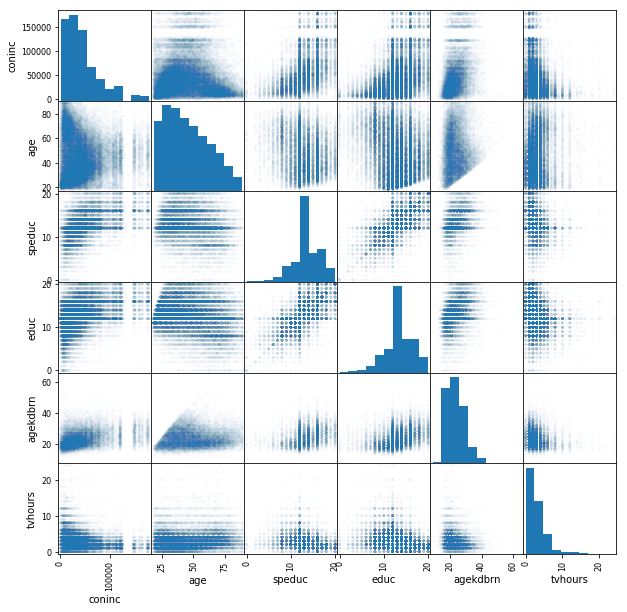

In [19]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data[["coninc", "age", "speduc", "educ", "agekdbrn", "tvhours"]], alpha = .01, figsize = (10, 10))
pass

Посмотрим статистические данные:

In [20]:
data.describe()

,age,educ,paeduc,maeduc,speduc,sibs,childs,agekdbrn,granborn,coninc,rank,tvhours
count,56859.000000,56897.000000,40173.000000,46929.000000,29626.000000,55382.000000,56880.000000,18119.000000,44996.000000,51232.000000,9854.000000,33855.000000
mean,45.697955,12.753590,10.554004,10.713844,12.780328,3.940053,1.952848,23.787130,1.154547,44503.038316,4.772681,2.970699
std,17.472112,3.181642,4.349151,3.744795,3.128766,3.190929,1.791539,5.432127,1.604481,35936.012301,1.855722,2.353317
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,383.000000,1.000000,0.000000
25%,31.000000,12.000000,8.000000,8.000000,12.000000,2.000000,0.000000,20.000000,0.000000,18445.000000,4.000000,2.000000
50%,43.000000,12.000000,12.000000,12.000000,12.000000,3.000000,2.000000,23.000000,0.000000,35602.000000,5.000000,2.000000
75%,59.000000,15.000000,13.000000,12.000000,15.000000,5.000000,3.000000,27.000000,2.000000,59542.000000,6.000000,4.000000
max,89.000000,20.000000,20.000000,20.000000,20.000000,68.000000,8.000000,65.000000,4.000000,180386.000000,10.000000,24.000000


Посмотрим подробнее, график зависимости доходов от уровня образования мужа или жены.

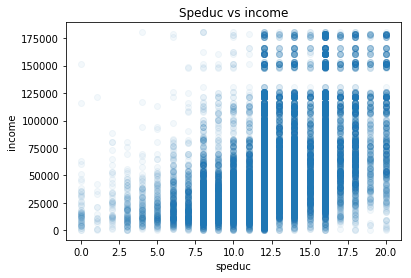

In [21]:
plt.plot(data['speduc'], data['coninc'], 'o', alpha = 0.05)
plt.xlabel('speduc')
plt.ylabel('income')
plt.title('Speduc vs income')
pass

Видимо, корреляция есть, но много рассеяния.

Теперь создадим новый категориальный признак на основании `coninc`, который и будем угадать при обучении.

In [22]:
data['coninc'].describe()

count     51232.000000
mean      44503.038316
std       35936.012301
min         383.000000
25%       18445.000000
50%       35602.000000
75%       59542.000000
max      180386.000000
Name: coninc, dtype: float64

In [16]:
def group_inc(row):
    if row['coninc'] >= 50000:
        return 1
    else:
        return 0

In [ ]:
### data['class'] = data.apply(group_inc, axis=1)
data = data.drop(['coninc'], axis=1)

Узнаем что-нибудь о нашем новом признаке:

In [25]:
data['class'].describe()

count    57061.000000
mean         0.298540
std          0.457622
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: class, dtype: float64

(array([40026., 17035.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

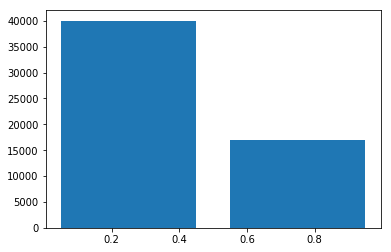

In [26]:
plt.hist(data['class'], rwidth=0.8, bins=2)

Первого больше, но и второго достаточно.

Мне интересно как много смотрят телевизор в зависимости от образования, для каждого класса: красные точки - доходы больше 50000 долларов в год.

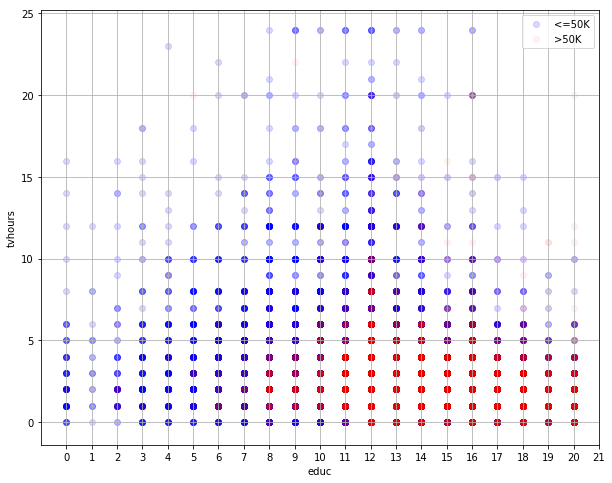

In [27]:
plt.figure(figsize = (10, 8))

plt.scatter(data["educ"][data['class'] == 0],
            data[data['class'] == 0]['tvhours'],
            alpha = 0.15,
            label = '<=50K',
            color = 'b')

plt.scatter(data["educ"][data['class'] == 1],
            data[data['class'] == 1]['tvhours'],
            alpha = 0.05,
            label = '>50K',
            color = 'r')

plt.xlabel('educ')
plt.xticks(range(22))
plt.xlim(-1, 21)
plt.ylabel('tvhours')
plt.legend()
plt.grid()

Если хотим можем ёще и рассеять эти точки чтобы увидеть те которые перекрываются.

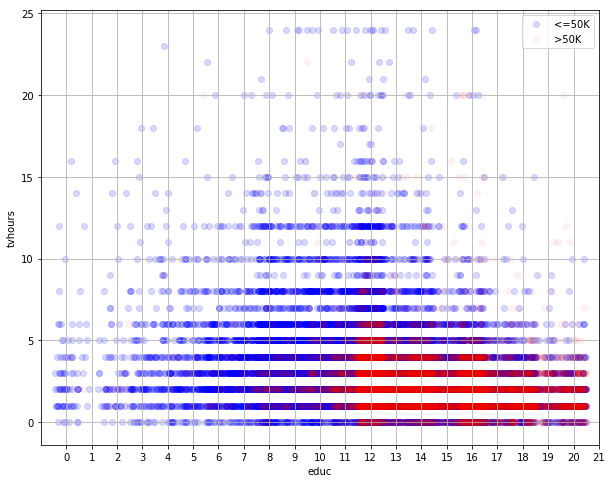

In [28]:
np.random.seed(0)
educ_rnd = data['educ'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(educ_rnd[data['class'] == 0],
            data[data['class'] == 0]['tvhours'],
            alpha = 0.15,
            label = '<=50K',
            color = 'b')

plt.scatter(educ_rnd[data['class'] == 1],
            data[data['class'] == 1]['tvhours'],
            alpha = 0.05,
            label = '>50K',
            color = 'r')

plt.xlabel('educ')
plt.xticks(range(22))
plt.xlim(-1, 21)
plt.ylabel('tvhours')
plt.legend()
plt.grid()

Чтобы понять это полностью, давайте посмотрим зависимость `tvhours` от возраста.

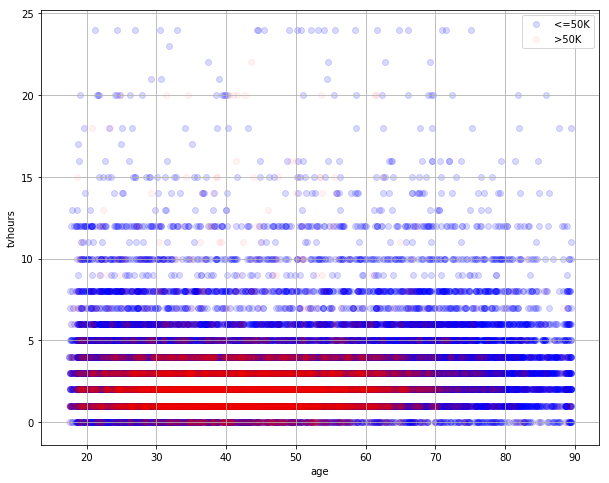

In [29]:
np.random.seed(0)
age_rnd = data['age'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(age_rnd[data['class'] == 0],
            data[data['class'] == 0]['tvhours'],
            alpha = 0.15,
            label = '<=50K',
            color = 'b')

plt.scatter(age_rnd[data['class'] == 1],
            data[data['class'] == 1]['tvhours'],
            alpha = 0.05,
            label = '>50K',
            color = 'r')

plt.xlabel('age')
plt.ylabel('tvhours')
plt.legend()
plt.grid()

Значит это не из-за возраста, это больше всего из-за образования.
Телевизор смотрят больше всех люди с законченным средним образованием, и больше те которые зарабатывают меньше.

Теперь посмотрим описание (статистические данные) категориальных и всех признаков.

In [30]:
data.describe(include = ['object'])

,sex,race,wrkstat,wrkslf,marital,spwrksta,incom16,born,parborn,partyid,polviews,news
count,57061,57061,57047,53549,57041,30697,43739,47804,47766,56734,47876,35689
unique,2,3,8,2,5,8,6,2,9,8,7,5
top,Female,White,Working Fulltime,Someone Else,Married,Working Fulltime,Average,Yes,Both In U.S,Not Str Democrat,Moderate,Everyday
freq,31915,46350,28207,47352,30761,16815,21941,43705,39137,12040,18494,17023


In [31]:
data.describe(include = 'all')

,age,sex,race,educ,paeduc,maeduc,speduc,wrkstat,wrkslf,marital,...,incom16,born,parborn,granborn,partyid,polviews,class,rank,news,tvhours
count,56859.000000,57061,57061,56897.000000,40173.000000,46929.000000,29626.000000,57047,53549,57041,...,43739,47804,47766,44996.000000,56734,47876,57061.000000,9854.000000,35689,33855.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,8,2,5,...,6,2,9,NaN,8,7,NaN,NaN,5,NaN
top,NaN,Female,White,NaN,NaN,NaN,NaN,Working Fulltime,Someone Else,Married,...,Average,Yes,Both In U.S,NaN,Not Str Democrat,Moderate,NaN,NaN,Everyday,NaN
freq,NaN,31915,46350,NaN,NaN,NaN,NaN,28207,47352,30761,...,21941,43705,39137,NaN,12040,18494,NaN,NaN,17023,NaN
mean,45.697955,NaN,NaN,12.753590,10.554004,10.713844,12.780328,NaN,NaN,NaN,...,NaN,NaN,NaN,1.154547,NaN,NaN,0.298540,4.772681,NaN,2.970699
std,17.472112,NaN,NaN,3.181642,4.349151,3.744795,3.128766,NaN,NaN,NaN,...,NaN,NaN,NaN,1.604481,NaN,NaN,0.457622,1.855722,NaN,2.353317
min,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,NaN,0.000000
25%,31.000000,NaN,NaN,12.000000,8.000000,8.000000,12.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,4.000000,NaN,2.000000
50%,43.000000,NaN,NaN,12.000000,12.000000,12.000000,12.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,5.000000,NaN,2.000000
75%,59.000000,NaN,NaN,15.000000,13.000000,12.000000,15.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,2.000000,NaN,NaN,1.000000,6.000000,NaN,4.000000


Находим категориальные и числовые признаки:

In [32]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['sex', 'race', 'wrkstat', 'wrkslf', 'marital', 'spwrksta', 'incom16', 'born', 'parborn', 'partyid', 'polviews', 'news']
['age', 'educ', 'paeduc', 'maeduc', 'speduc', 'sibs', 'childs', 'agekdbrn', 'granborn', 'class', 'rank', 'tvhours']


In [33]:
for c in categorical_columns:
    print(c, data[c].unique())
    print()

sex ['Female' 'Male']

race ['White' 'Black' 'Other']

wrkstat ['Working Fulltime' 'Retired' 'Working Parttime' 'Keeping House' 'School'
 'Unempl, Laid Off' 'Temp Not Working' 'Other' nan]

wrkslf ['Someone Else' nan 'Self-Employed']

marital ['Never Married' 'Married' 'Divorced' 'Widowed' 'Separated' nan]

spwrksta [nan 'Keeping House' 'Working Fulltime' 'Temp Not Working'
 'Working Parttime' 'Retired' 'Unempl, Laid Off' 'School' 'Other']

incom16 ['Average' 'Above Average' 'Below Average' 'Far Below Average' nan
 'Far Above Average' 'Lived In Institution']

born [nan 'Yes' 'No']

parborn [nan 'Neither In U.S' 'Both In U.S' 'Mother Only' 'Father Only'
 'Dk For Both' 'Mother; Fa. Dk' 'Not Mother;Fa.Dk' 'Not Father;Mo.Dk'
 'Father; Mo.Dk']

partyid ['Ind,Near Dem' 'Not Str Democrat' 'Independent' 'Strong Democrat'
 'Not Str Republican' 'Ind,Near Rep' 'Strong Republican' 'Other Party' nan]

polviews [nan 'Moderate' 'Slightly Conservative' 'Conservative' 'Liberal'
 'Extrmly Conservative' 

## Обрабатываем пропущенные значения

Если данные содержат пропущенные значения, то имеется две простые альтернативы:
- удалить столбцы с такими значениями (`data = data.dropna(axis = 1)`),
- удалить строки с такими значениями (`data = data.dropna(axis = 0)`).

После этого данных может стать совсем мало.

Куда более эффективным (и в то же время по-прежнему простым) методом обычно является заполнение пропущенных значений для каждой количественной переменной их средним или медианным значением. 
Для категориальных признаков пропущенные значения можно заполнить самым популярным значением в столбце.

In [34]:
data['class'].isna().sum()

0

Главное что нет пропущенных значений в столбце `class`

In [35]:
data[numerical_columns].median()

age         43.0
educ        12.0
paeduc      12.0
maeduc      12.0
speduc      12.0
sibs         3.0
childs       2.0
agekdbrn    23.0
granborn     0.0
class        0.0
rank         5.0
tvhours      2.0
dtype: float64

In [36]:
data[numerical_columns] = data[numerical_columns].fillna(data.median(axis = 0), axis = 0)

Проверим как обработаны пропущенные значения:

In [37]:
data[numerical_columns].count(axis = 0)

age         57061
educ        57061
paeduc      57061
maeduc      57061
speduc      57061
sibs        57061
childs      57061
agekdbrn    57061
granborn    57061
class       57061
rank        57061
tvhours     57061
dtype: int64

In [38]:
data[categorical_columns].count(axis = 0)

sex         57061
race        57061
wrkstat     57047
wrkslf      53549
marital     57041
spwrksta    30697
incom16     43739
born        47804
parborn     47766
partyid     56734
polviews    47876
news        35689
dtype: int64

Осталось заполнить пропущенные категориальные значения наичаще повторяемыми.

In [39]:
data['wrkstat'].describe()

count                57047
unique                   8
top       Working Fulltime
freq                 28207
Name: wrkstat, dtype: object

In [40]:
type(data['wrkstat'].describe())

pandas.core.series.Series

In [41]:
data['wrkstat'].describe().top

'Working Fulltime'

In [42]:
#data['wrkstat'] = data['wrkstat'].fillna(data['wrkstat'].describe().top)

In [43]:
data.describe(include = [object])

,sex,race,wrkstat,wrkslf,marital,spwrksta,incom16,born,parborn,partyid,polviews,news
count,57061,57061,57047,53549,57041,30697,43739,47804,47766,56734,47876,35689
unique,2,3,8,2,5,8,6,2,9,8,7,5
top,Female,White,Working Fulltime,Someone Else,Married,Working Fulltime,Average,Yes,Both In U.S,Not Str Democrat,Moderate,Everyday
freq,31915,46350,28207,47352,30761,16815,21941,43705,39137,12040,18494,17023


In [44]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

После обработки:

In [45]:
data.describe(include = [object])

,sex,race,wrkstat,wrkslf,marital,spwrksta,incom16,born,parborn,partyid,polviews,news
count,57061,57061,57061,57061,57061,57061,57061,57061,57061,57061,57061,57061
unique,2,3,8,2,5,8,6,2,9,8,7,5
top,Female,White,Working Fulltime,Someone Else,Married,Working Fulltime,Average,Yes,Both In U.S,Not Str Democrat,Moderate,Everyday
freq,31915,46350,28221,50864,30781,43179,35263,52962,48432,12367,27679,38395


## Векторизация

Нужно что-то сделать с категориальными (номинальными) признаками

In [46]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['sex', 'wrkslf', 'born'] ['race', 'wrkstat', 'marital', 'spwrksta', 'incom16', 'parborn', 'partyid', 'polviews', 'news']


In [47]:
data['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [48]:
for name in binary_columns:
    unq = data[name].unique()
    print(unq)
    data.at[data[name] == unq[0], name] = 0
    data.at[data[name] == unq[1], name] = 1

data['sex'].describe()

['Female' 'Male']
['Someone Else' 'Self-Employed']
['Yes' 'No']


count    57061.000000
mean         0.440686
std          0.496474
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: sex, dtype: float64

### К небинарными признакам применим метод _векторизации_, 
который заключается в следующем.

Признак `j`, принимающий `s` значений, заменим на `s` признаков, принимащих значения `0` или `1`,
в зависимости от того, чему равно значение исходного признака `j`.

Например, в нашей задаче признак `race` принимает 3 различных значений: 

In [49]:
data['race'].unique()

array(['White', 'Black', 'Other'], dtype=object)

Заменим признак `race` 3 признаками: `race_White`, `race_Black`, `race_Other`.

 - Если признак `race` принимает значение `White`, то признак `race_White` равен `1`, а все остальные равны `0`.
 - Если признак `race` принимает значение `Black`, то признак `race_Black` равен `1`, а все остальные равны `0`.
 - и т.д.

Такую векторизацию осуществляет в pandas метод `get_dummies`:

In [50]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['race_Black', 'race_Other', 'race_White', 'wrkstat_Keeping House',
       'wrkstat_Other', 'wrkstat_Retired', 'wrkstat_School',
       'wrkstat_Temp Not Working', 'wrkstat_Unempl, Laid Off',
       'wrkstat_Working Fulltime', 'wrkstat_Working Parttime',
       'marital_Divorced', 'marital_Married', 'marital_Never Married',
       'marital_Separated', 'marital_Widowed', 'spwrksta_Keeping House',
       'spwrksta_Other', 'spwrksta_Retired', 'spwrksta_School',
       'spwrksta_Temp Not Working', 'spwrksta_Unempl, Laid Off',
       'spwrksta_Working Fulltime', 'spwrksta_Working Parttime',
       'incom16_Above Average', 'incom16_Average', 'incom16_Below Average',
       'incom16_Far Above Average', 'incom16_Far Below Average',
       'incom16_Lived In Institution', 'parborn_Both In U.S',
       'parborn_Dk For Both', 'parborn_Father Only', 'parborn_Father; Mo.Dk',
       'parborn_Mother Only', 'parborn_Mother; Fa. Dk',
       'parborn_Neither In U.S', 'parborn_Not Father;Mo.Dk',
   

## Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных.
К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно _нормализовать_.
Это можно делать разными способами.
Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [51]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,age,educ,paeduc,maeduc,speduc,sibs,childs,agekdbrn,granborn,class,rank,tvhours
count,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000
mean,45.688404,12.751424,10.981967,10.942220,12.405145,3.912392,1.952998,23.249943,0.910429,0.298540,4.960744,2.575928
std,17.441894,3.177322,3.708438,3.431464,2.287893,3.147643,1.788697,3.082825,1.500760,0.457622,0.775909,1.874340
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,1.000000,0.000000
25%,31.000000,12.000000,8.000000,9.000000,12.000000,2.000000,0.000000,23.000000,0.000000,0.000000,5.000000,2.000000
50%,43.000000,12.000000,12.000000,12.000000,12.000000,3.000000,2.000000,23.000000,0.000000,0.000000,5.000000,2.000000
75%,59.000000,15.000000,12.000000,12.000000,12.000000,5.000000,3.000000,23.000000,2.000000,1.000000,5.000000,3.000000
max,89.000000,20.000000,20.000000,20.000000,20.000000,68.000000,8.000000,65.000000,4.000000,1.000000,10.000000,24.000000


In [52]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [53]:
data_numerical.describe()

,age,educ,paeduc,maeduc,speduc,sibs,childs,agekdbrn,granborn,class,rank,tvhours
count,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04
mean,-1.390973e-15,-1.145490e-14,3.390206e-14,-9.592714e-14,-7.173102e-14,5.667253e-16,6.362887e-15,8.212894e-15,-4.266087e-14,1.107614e-14,-1.476717e-14,5.309354e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.587465e+00,-4.013261e+00,-2.961345e+00,-3.188790e+00,-5.422084e+00,-1.242959e+00,-1.091855e+00,-4.622366e+00,-6.066453e-01,-6.523733e-01,-5.104653e+00,-1.374312e+00
25%,-8.421335e-01,-2.364960e-01,-8.041031e-01,-5.660032e-01,-1.770823e-01,-6.075631e-01,-1.091855e+00,-8.107598e-02,-6.066453e-01,-6.523733e-01,5.059389e-02,-3.072696e-01
50%,-1.541348e-01,-2.364960e-01,2.745181e-01,3.082591e-01,-1.770823e-01,-2.898651e-01,2.627741e-02,-8.107598e-02,-6.066453e-01,-6.523733e-01,5.059389e-02,-3.072696e-01
75%,7.631967e-01,7.076953e-01,2.745181e-01,3.082591e-01,-1.770823e-01,3.455309e-01,5.853435e-01,-8.107598e-02,7.260125e-01,1.532838e+00,5.059389e-02,2.262517e-01
max,2.483193e+00,2.281347e+00,2.431760e+00,2.639625e+00,3.319585e+00,2.036050e+01,3.380674e+00,1.354279e+01,2.058670e+00,1.532838e+00,6.494652e+00,1.143020e+01


## Соединяем все в одну таблицу

In [54]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)
#print data.columns

(57061, 74)


In [55]:
data.describe()

,age,educ,paeduc,maeduc,speduc,sibs,childs,agekdbrn,granborn,class,...,polviews_Slightly Conservative,polviews_Slightly Liberal,news_Everyday,news_Few Times A Week,news_Less Than Once Wk,news_Never,news_Once A Week,sex,wrkslf,born
count,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,...,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000
mean,-1.390973e-15,-1.145490e-14,3.390206e-14,-9.592714e-14,-7.173102e-14,5.667253e-16,6.362887e-15,8.212894e-15,-4.266087e-14,1.107614e-14,...,0.134786,0.108323,0.672876,0.134137,0.063231,0.049158,0.080598,0.440686,0.108603,0.071835
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.341497,0.310790,0.469167,0.340803,0.243379,0.216200,0.272219,0.496474,0.311143,0.258217
min,-1.587465e+00,-4.013261e+00,-2.961345e+00,-3.188790e+00,-5.422084e+00,-1.242959e+00,-1.091855e+00,-4.622366e+00,-6.066453e-01,-6.523733e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.421335e-01,-2.364960e-01,-8.041031e-01,-5.660032e-01,-1.770823e-01,-6.075631e-01,-1.091855e+00,-8.107598e-02,-6.066453e-01,-6.523733e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.541348e-01,-2.364960e-01,2.745181e-01,3.082591e-01,-1.770823e-01,-2.898651e-01,2.627741e-02,-8.107598e-02,-6.066453e-01,-6.523733e-01,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.631967e-01,7.076953e-01,2.745181e-01,3.082591e-01,-1.770823e-01,3.455309e-01,5.853435e-01,-8.107598e-02,7.260125e-01,1.532838e+00,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2.483193e+00,2.281347e+00,2.431760e+00,2.639625e+00,3.319585e+00,2.036050e+01,3.380674e+00,1.354279e+01,2.058670e+00,1.532838e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# X и y

In [56]:
X = data.drop(('class'), axis = 1) # выбрасываем столбец 'class'
y = data['class'].astype(int)
feature_names = X.columns


In [57]:
type(feature_names)

pandas.core.indexes.base.Index

In [58]:
feature_names

Index(['age', 'educ', 'paeduc', 'maeduc', 'speduc', 'sibs', 'childs',
       'agekdbrn', 'granborn', 'rank', 'tvhours', 'race_Black', 'race_Other',
       'race_White', 'wrkstat_Keeping House', 'wrkstat_Other',
       'wrkstat_Retired', 'wrkstat_School', 'wrkstat_Temp Not Working',
       'wrkstat_Unempl, Laid Off', 'wrkstat_Working Fulltime',
       'wrkstat_Working Parttime', 'marital_Divorced', 'marital_Married',
       'marital_Never Married', 'marital_Separated', 'marital_Widowed',
       'spwrksta_Keeping House', 'spwrksta_Other', 'spwrksta_Retired',
       'spwrksta_School', 'spwrksta_Temp Not Working',
       'spwrksta_Unempl, Laid Off', 'spwrksta_Working Fulltime',
       'spwrksta_Working Parttime', 'incom16_Above Average', 'incom16_Average',
       'incom16_Below Average', 'incom16_Far Above Average',
       'incom16_Far Below Average', 'incom16_Lived In Institution',
       'parborn_Both In U.S', 'parborn_Dk For Both', 'parborn_Father Only',
       'parborn_Father; Mo.Dk', 

In [59]:
print(X.shape)
print(y.shape)
N, d = X.shape

(57061, 73)
(57061,)


In [60]:
type(X)

pandas.core.frame.DataFrame

In [61]:
type(y)

pandas.core.series.Series

In [17]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

39942 17119


In [64]:
N_train + N_test

57061

In [65]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: class, dtype: int64

# $k$NN

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [67]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [68]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.19806219017575485 0.2366960686956014


In [69]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [70]:
err_test

0.23669606869560134

Ошибка на обучающей выборке 0.198, а ошибка на тестовой выборке 0.2367. Это наверно можно улучшить подбирая другой параметр k, или другой алгоритм обучения.

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
print(confusion_matrix(y_test, y_test_predict))

[[10774  1256]
 [ 2796  2293]]


In [73]:
confusion_matrix([0,1,0,1,0,1], [0,1,0,0,0,1])

array([[3, 0],
       [1, 2]])

Правильно предсказано 10774 принадлежащих классу зарабатывающих меньше 50000 в год (класс 0), и 2293 зарабатывающих больше (класс 1). 2796 случай когда предсказано класс 0, но эти люди зарабатывают больше, и 1256 обратных случаев.

### Подбор параметров

Узнаём  для какого k, тестовая ошибка наименьшая. Построим график зависимости ошибок (на обучающей выборке и на тестовой выборке), от гиперпараметра k.

In [74]:
def try_k(k):
    knn = KNeighborsClassifier(n_neighbors = k)
    #knn.set_params(n_neighbors=10)
    knn.fit(X_train, y_train)
    return (1 - knn.score(X_train, y_train), 1 - knn.score(X_test, y_test))

In [75]:
ks = [1, 3, 6, 10, 13, 16, 20, 23, 25, 30, 35, 40, 50, 100, 1000, 10000, X_test.shape[0]-1]
results_for_k = [try_k(k) for k in ks]
print(ks)
print(results_for_k)

[1, 3, 6, 10, 13, 16, 20, 23, 25, 30, 35, 40, 50, 100, 1000, 10000, 17118]
[(0.0, 0.3090133769495882), (0.14716338691102093, 0.26981716221741925), (0.18519353061939814, 0.24522460424090187), (0.19806219017575488, 0.23669606869560134), (0.20286916028240953, 0.23815643437116651), (0.20524760903309802, 0.23453472749576498), (0.20820189274447953, 0.2306209474852503), (0.20920334485003256, 0.23196448390677027), (0.21012968804766907, 0.23079619136631813), (0.2112062490611386, 0.2289853379286173), (0.21328426218016128, 0.22951106957182077), (0.2147113314305743, 0.22717448449091648), (0.2159631465625157, 0.22670716747473563), (0.21656401782584744, 0.22518838717214795), (0.22800560813179105, 0.22699924060984866), (0.27502378448750686, 0.27232899117939136), (0.29908367132341895, 0.29727203691804427)]


Посмотрим ещё раз на результаты, и найдём самый лучший k:

In [76]:
results_paired = {}
i = 0
while i < len(ks):
    results_paired[ks[i]] = results_for_k[i]
    i = i + 1

min_index, _ = min(enumerate([t for _, t in results_for_k]), key=operator.itemgetter(1))

print(results_paired)
print('Самое лучшее k: ', ks[min_index])
print('Ошибки на обучающей и тестовой выборках: ', results_for_k[min_index])

{1: (0.0, 0.3090133769495882), 3: (0.14716338691102093, 0.26981716221741925), 6: (0.18519353061939814, 0.24522460424090187), 10: (0.19806219017575488, 0.23669606869560134), 13: (0.20286916028240953, 0.23815643437116651), 16: (0.20524760903309802, 0.23453472749576498), 20: (0.20820189274447953, 0.2306209474852503), 23: (0.20920334485003256, 0.23196448390677027), 25: (0.21012968804766907, 0.23079619136631813), 30: (0.2112062490611386, 0.2289853379286173), 35: (0.21328426218016128, 0.22951106957182077), 40: (0.2147113314305743, 0.22717448449091648), 50: (0.2159631465625157, 0.22670716747473563), 100: (0.21656401782584744, 0.22518838717214795), 1000: (0.22800560813179105, 0.22699924060984866), 10000: (0.27502378448750686, 0.27232899117939136), 17118: (0.29908367132341895, 0.29727203691804427)}
Самое лучшее k:  100
Ошибки на обучающей и тестовой выборках:  (0.21656401782584744, 0.22518838717214795)


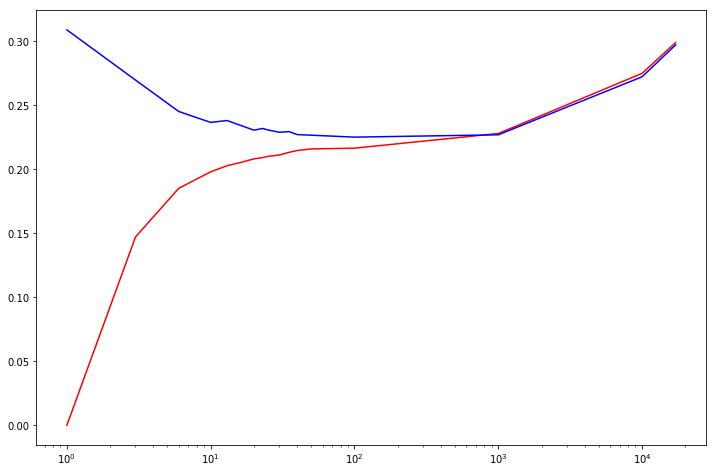

In [77]:
plt.rcParams["figure.figsize"] = [12, 8]
axes = plt.gca()
axes.set_xscale('log', basex=10)
plt.plot(ks, [r[0] for r in results_for_k], color="r")
plt.plot(ks, [r[1] for r in results_for_k], color="b")

Красная линия, это ошибка на обучающей выборке. Синяя линия, это ошибка на тестовой выборке. Как возрастает k, так ошибки сходятся. На тестовой выборке, достигается минимум k=100. Для k > 100 ошибка на обучающей выборке становится больше ошибки на тестовой выборке. Могли бы поискать ещё лучшее k в окрестности 100, но вряд ли разница будет значительной.

## Нейронные сети

In [78]:
from sklearn.neural_network import MLPClassifier

Чтобы сэкономить время а не потерять полезные информации, попробуем следующий подход. Попробуем 3 значения числа нейронов в первом слое, и 3 в втором (получается 9 вариантов), и ещё 9 значений параметра альфа (81 вариант). Лучшие значения альфа попробуем с сетью у которой 1 скрытый слой.

In [79]:
def try_combination(alpha, hidden_layer_sizes):
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = hidden_layer_sizes,
                              solver = 'lbfgs', activation = 'logistic', random_state = 4)
    mlp_model.fit(X_train, y_train)
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    return (np.mean(y_train_pred != y_train), np.mean(y_test_pred != y_test))


Определим наши гиперпараметры, и нарисуем альфа, чтобы понять какие значения принимает. 

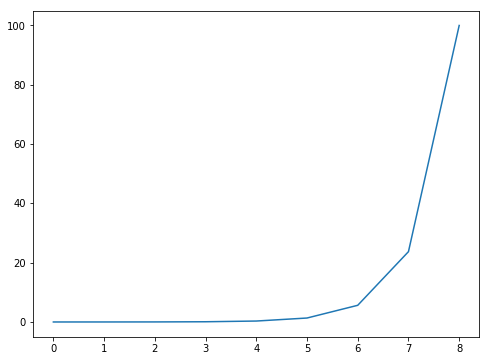

In [80]:
HL1_sizes = [X_train.shape[1]//2, X_train.shape[1], X_train.shape[1]*2]
HL2_sizes = [2, 8, 32]
alphas = np.logspace(-3, 2, 9)
plt.rcParams["figure.figsize"] = [8, 6]
plt.plot(range(9), alphas)

Теперь, главный и долгий процесс нахождения результатов для разных значений гиперпараметров.

In [81]:
results = [[[try_combination(alpha, (L1, L2)) for alpha in alphas] for L2 in HL2_sizes] for L1 in HL1_sizes]

In [82]:
#x = [err for err in [alphai for alphai in enumerate([l2i for l2i in enumerate([l1i for l1i in enumerate(results)])])]]
min_iL1 = 0
min_iL2 = 0
min_ialpha = 0
min_test_err = 1
min_train_err = 1
for iL1, vL1 in enumerate(results):
    for iL2, vL2 in enumerate(vL1):
        curr_min_ialpha, curr_min_value = min(enumerate(vL2), key=(lambda x: x[1][1]))
        if (min_test_err > curr_min_value[1]):
            min_train_err = curr_min_value[0]
            min_test_err = curr_min_value[1]
            min_ialpha = curr_min_ialpha
            min_iL2 = iL2
            min_iL1 = iL1

print('Наименьшая ошибка на тестовой выборке: ',  min_test_err)
print('Соответствующая ошибка на обучающей выборке: ',  min_train_err)
print(f'Соответствующие количества нейронов в первом слое {HL1_sizes[min_iL1]}, втором {HL2_sizes[min_iL2]} и альфа {alphas[min_ialpha]}.')

Наименьшая ошибка на тестовой выборке:  0.20906595011390852
Соответствующая ошибка на обучающей выборке:  0.2041960843222673
Соответствующие количества нейронов в первом слое 73, втором 8 и альфа 5.623413251903491.


Нарисуем результаты. Пунктирная линия обозначает ошибку на обучающей выборке, а сплошная на тестовой.

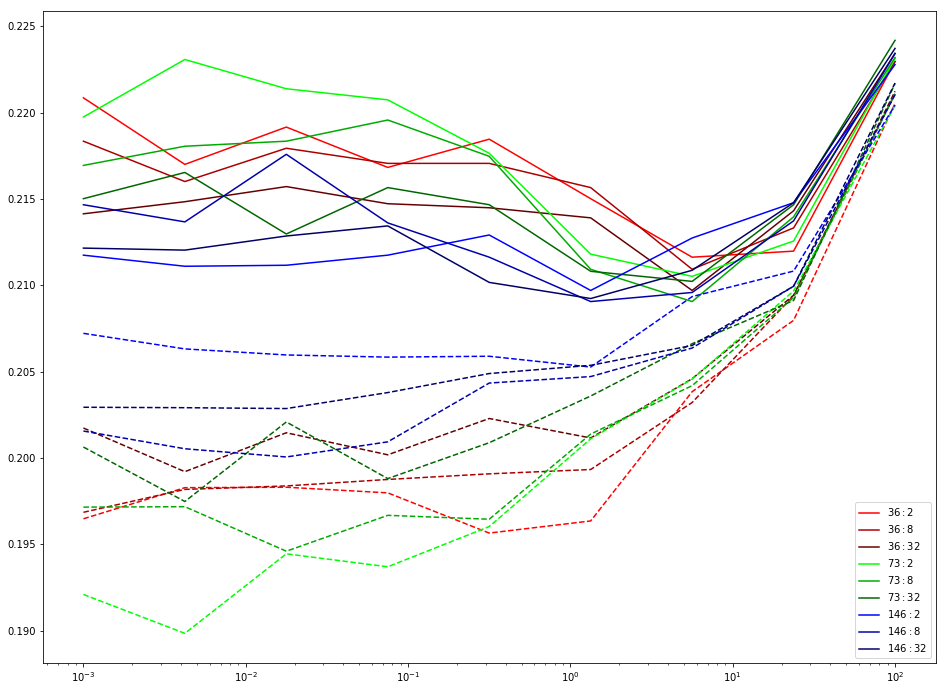

In [83]:
colors = [['#ff0000', '#aa0000', '#660000'], ['#00ff00', '#00aa00', '#006600'], ['#0000ff', '#0000aa', '#000066']]
plt.rcParams["figure.figsize"] = [16, 12]
axes = plt.gca()
axes.set_xscale('log', basex=10)

for i in range(len(HL1_sizes)):
    for j in range(len(HL2_sizes)):
        plt.plot(alphas, [train_err for train_err, _ in results[i][j]],
             color=colors[i][j], linestyle='dashed')
        plt.plot(alphas, [test_err for _, test_err in results[i][j]],
             color=colors[i][j], linestyle='solid',
             label=f'${HL1_sizes[i]}:${HL2_sizes[j]}')

plt.legend(loc='best')
plt.show()

При маленьких альфа переобучение очевидно, а результаты в зависимости от количества нейронов непредсказуемы. Слишком большие альфа не позволяют сети обучиться, и в результате получаем недообучение. Эти выводы не зависят от количества нейронов. При альфа около 5, получаем лучшее отношение между переобучением и недообучением, а графики  обозначающие ошибки на обучающей и тестовой выборках почти симметричные, т.е. при небольшом количестве нейронов в первом слое ошибки на обучвющей выборке маленькие, но на тестовой почти наоборот. Смотря на график, кажется что если переобучение то лучше повысить количество нейронов в первом слое. Это несколько неожиданно, потому что таким образом усложняется функция которую сеть собой представляет. В втором слое, лучше уменьшить количество нейронов (кроме случая когда в первом слое много нейронов (146), а альфа принимает маленькие значения). В общем, трудно предсказать какое количество нейронов будет лучшим, но лучше избегать слишком маленькие и слишком большие значения, особенно при оптимальном альфа.

Попробуем с одним скрытым слоем.

In [84]:
HL_sizes = HL2_sizes + HL1_sizes
results1 = [[try_combination(alpha, (L,)) for alpha in alphas] for L in HL_sizes]

In [85]:
min_iL = 0
min_ialpha = 0
min_test_err = 1
min_train_err = 1
for iL, vL in enumerate(results1):
        curr_min_ialpha, curr_min_value = min(enumerate(vL), key=(lambda x: x[1][1]))
        if (min_test_err > curr_min_value[1]):
            min_train_err = curr_min_value[0]
            min_test_err = curr_min_value[1]
            min_ialpha = curr_min_ialpha
            min_iL = iL

print('Наименьшая ошибка на тестовой выборке: ',  min_test_err)
print('Соответствующая ошибка на обучающей выборке: ',  min_train_err)
print(f'Соответствующее количество нейронов {HL_sizes[min_iL]} и альфа {alphas[min_ialpha]}.')

Наименьшая ошибка на тестовой выборке:  0.20859863309772766
Соответствующая ошибка на обучающей выборке:  0.20459666516448852
Соответствующее количество нейронов 73 и альфа 5.623413251903491.


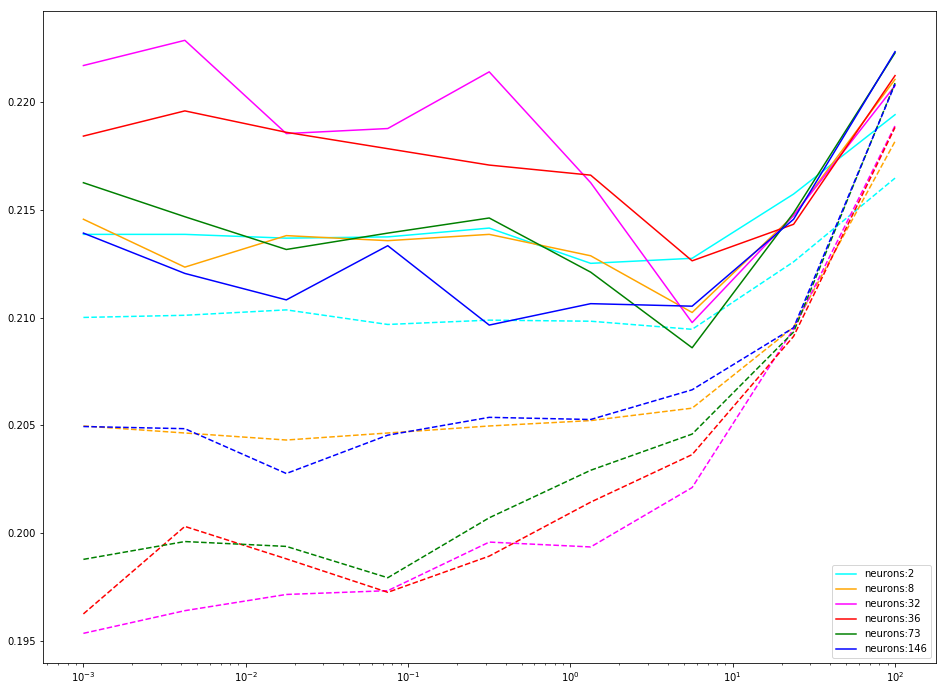

In [86]:
colors1 = ['cyan', 'orange', 'magenta', 'red', 'green', 'blue']
plt.rcParams["figure.figsize"] = [16, 12]
axes = plt.gca()
axes.set_xscale('log', basex=10)

for i in range(len(HL_sizes)):
    plt.plot(alphas, [train_err for train_err, _ in results1[i]],
             color=colors1[i], linestyle='dashed')
    plt.plot(alphas, [test_err for _, test_err in results1[i]],
             color=colors1[i], linestyle='solid', label=f'neurons:{HL_sizes[i]}')

plt.legend(loc='best')
plt.show()

Выводы очень похожие на предыдущие, результаты одинаковые, только ошибка на тестовой выборке чуть меньше.

Полученные результаты наверно приблизительны байесовой ошибке, и чтобы уменьшить ошибку, наверно придется получить дополнительные признаки.

Действительно, если бросить только следующие столбцы: `caseid`, `year`, `hispanic`, `degree`, `sei`, `income06`, `region`, получаются лучшие результаты:

Наименьшая ошибка на тестовой выборке:  0.18680997721829545

Соответствующая ошибка на обучающей выборке:  0.1735516498923439

Соответствующее количество нейронов 32 и альфа 23.71373705661655.

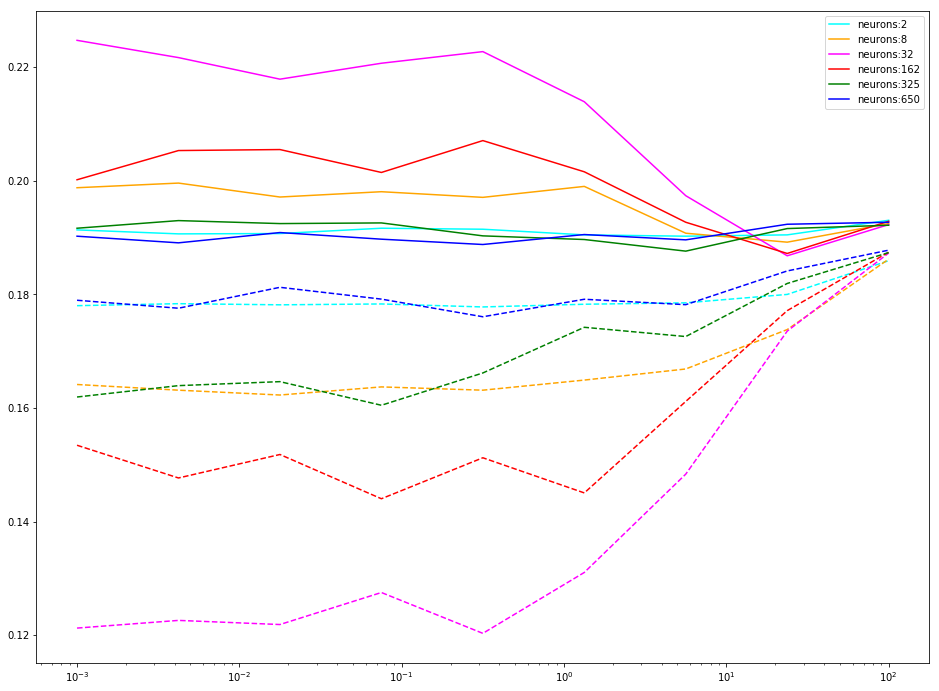

Новая сеть, с большим количеством признаков и нейронов, легче переобучается. Но остальные выводы остаются более менее одинаковыми.

## Случайные леса - подготовка

In [87]:
from sklearn import ensemble

In [88]:
def print_forest_results(results, n_estimators):
    print(results)
    mi, _ = min(enumerate([err[1] for err in results]), key=operator.itemgetter(1))
    print()
    print(f'Лучшее количество деревьев {n_estimators[mi]}, соответствующая ошибка на обучающей выборке {results[mi][0]}, тестовой {results[mi][1]}')
    if len(results[0]) == 3:
        print(f'OOB ошибка {results[mi][2]}')


In [89]:
def plot_forest_results(results, n_estimators):
    plt.rcParams["figure.figsize"] = [12, 8]
    axes = plt.gca()
    axes.set_xscale('log', basex=4)

    plt.plot(n_estimators, [err[0] for err in results],
             color='red', linestyle='solid', marker='o', label='Train err')
    plt.plot(n_estimators, [err[1] for err in results],
             color='blue', linestyle='solid', marker='o', label='Test err')
    if len(results[0]) == 3:
        plt.plot(n_estimators, [err[2] for err in results],
                 color='green', linestyle='solid', marker='o', label='OOB err')

    plt.legend(loc='best')
    plt.show()

In [90]:
orig_X_train = X_train
orig_y_train = y_train
orig_X_test = X_test
orig_y_test = y_test

try_X_train = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
try_y_train = np.array([0, 1, 1, 0])
try_X_test = np.array([[-2, -0.5], [-0.7, 2.4], [0.1, -0.1], [0.01, 0.2]])
try_y_test = np.array([0, 1, 1, 0])

In [18]:
class DataSet:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

In [92]:
try_ds = DataSet(try_X_train, try_y_train, try_X_test, try_y_test)
real_ds = DataSet(X_train, y_train, X_test, y_test)

In [35]:
small_data = data.sample(n = 1000)
print(small_data.shape)
small_X = small_data.drop(('class'), axis = 1) # выбрасываем столбец 'class'
small_y = small_data['class'].astype(int)
small_X_train, small_X_test, small_y_train, small_y_test = train_test_split(small_X, small_y, test_size = 0.5, random_state = 141)
small_ds = DataSet(small_X_train, small_y_train, small_X_test, small_y_test)

(1000, 326)


In [19]:
# Определяем, для разработки или настоящие данные
ds = real_ds
#ds = small_ds
#ds = try_ds

In [95]:
ds.y_train.head()

46119    0
44209    0
55459    0
17240    0
26837    0
Name: class, dtype: int64

In [96]:
print(ds.X_train.shape)

(39942, 73)


# Random Forest

In [97]:
def try_n_random_forests(X_train, y_train, X_test, y_test, n_estimators):
    en = ensemble.RandomForestClassifier(n_estimators = n_estimators, oob_score = True)
    en.fit(X_train, y_train)
    err_train = np.mean(y_train != en.predict(X_train))
    err_oob = 1 - en.oob_score_
    err_test = np.mean(y_test != en.predict(X_test))
    return (err_train, err_test, err_oob)

In [98]:
n_estimators = [6, 10, 30, 60, 100, 300, 600, 1000]

results_for_random_forests = [try_n_random_forests(ds.X_train, ds.y_train, ds.X_test, ds.y_test, ne) \
                            for ne in n_estimators]

/Users/marko/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/marko/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/marko/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/marko/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/marko/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide b

In [99]:
print_forest_results(results_for_random_forests, n_estimators)

[(0.03605227579990987, 0.24382265319235938, 0.27762755996194477), (0.016173451504681788, 0.23377533734447106, 0.26365730308947977), (0.0014270692504130989, 0.21987265611309073, 0.23474037354163535), (0.00012518151319413148, 0.2179449734213447, 0.22455059836763303), (0.0, 0.21654302237280215, 0.21791597816834407), (0.0, 0.21566680296746304, 0.21503680336487907), (0.0, 0.2152579005783048, 0.2137849882329378), (0.0, 0.21543314445937262, 0.21511191227279558)]

Лучшее количество деревьев 600, соответствующая ошибка на обучающей выборке 0.0, тестовой 0.2152579005783048
OOB ошибка 0.2137849882329378


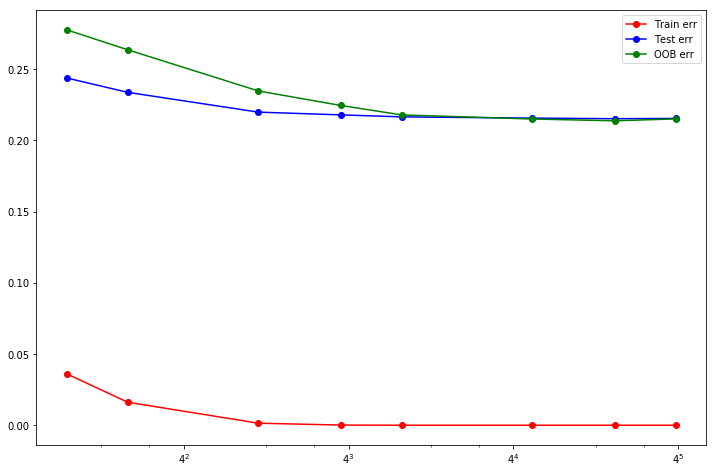

In [100]:
plot_forest_results(results_for_random_forests, n_estimators)

OOB ошибка хорошо приближает тестовую, которая много вишее тестовой. Хотя это так, я не сказал бы, что это класическое переобучение, потому что, грофики выглядят более менее похоже, только сдвинуто. Это значит что с уменшением ошибки на обучающей выборке уменшается и ошибка на тестовой, но она просто не можеть достичь такой уровень. 

# Extremely Randomized Forests

In [101]:
def try_n_extremely_randomized_forests(X_train, y_train, X_test, y_test, n_estimators):
    en = ensemble.ExtraTreesClassifier(n_estimators = n_estimators)
    en.fit(X_train, y_train)
    err_train = np.mean(y_train != en.predict(X_train))
    err_test = np.mean(y_test != en.predict(X_test))
    return (err_train, err_test)

In [102]:
n_estimators = [6, 10, 30, 60, 100, 300, 600, 1000]

results_for_extremely_randomized_forests = [try_n_extremely_randomized_forests(ds.X_train, ds.y_train, ds.X_test, ds.y_test, ne) \
                            for ne in n_estimators]

In [103]:
print_forest_results(results_for_extremely_randomized_forests, n_estimators)

[(0.0, 0.25094923768911737), (0.0, 0.24201179975465856), (0.0, 0.23272387405806413), (0.0, 0.22583094806939658), (0.0, 0.222209241193995), (0.0, 0.22191716805888195), (0.0, 0.22267655821017582), (0.0, 0.22267655821017582)]

Лучшее количество деревьев 300, соответствующая ошибка на обучающей выборке 0.0, тестовой 0.22191716805888195


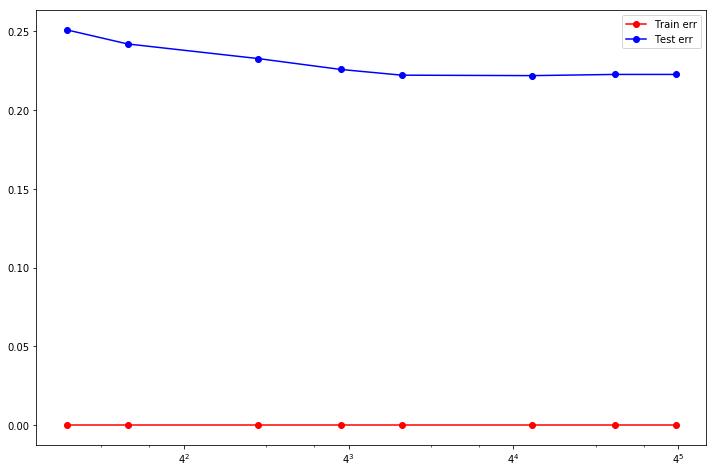

In [104]:
plot_forest_results(results_for_extremely_randomized_forests, n_estimators)

Здесь ошибка чуть-чуть больше предыдущей, но оба результата существенно не отличаются (они похожие как и методы).

# AdaBoost

In [105]:
def try_n_adaboost(X_train, y_train, X_test, y_test, n_estimators):
    en = ensemble.AdaBoostClassifier(n_estimators = n_estimators)
    en.fit(X_train, y_train)
    err_train = np.mean(y_train != en.predict(X_train))
    err_test = np.mean(y_test != en.predict(X_test))
    return (err_train, err_test)

In [106]:
n_estimators = [6, 10, 16, 26, 30, 60, 100, 300, 600, 1000]

results_for_adaboost = [try_n_adaboost(ds.X_train, ds.y_train, ds.X_test, ds.y_test, ne) \
                            for ne in n_estimators]

In [107]:
print_forest_results(results_for_adaboost, n_estimators)

[(0.2411496670171749, 0.2366960686956014), (0.24134995743828552, 0.23581984929026228), (0.2280807170397076, 0.22810911852327823), (0.2226979119723599, 0.2232607044804019), (0.22177156877472334, 0.22466265552894446), (0.21365980671974363, 0.22028155850224895), (0.2130589354564118, 0.2195805829779777), (0.2108807771268339, 0.21665985162684737), (0.21015472435030794, 0.21718558327005083), (0.21015472435030794, 0.21759448565920905)]

Лучшее количество деревьев 300, соответствующая ошибка на обучающей выборке 0.2108807771268339, тестовой 0.21665985162684737


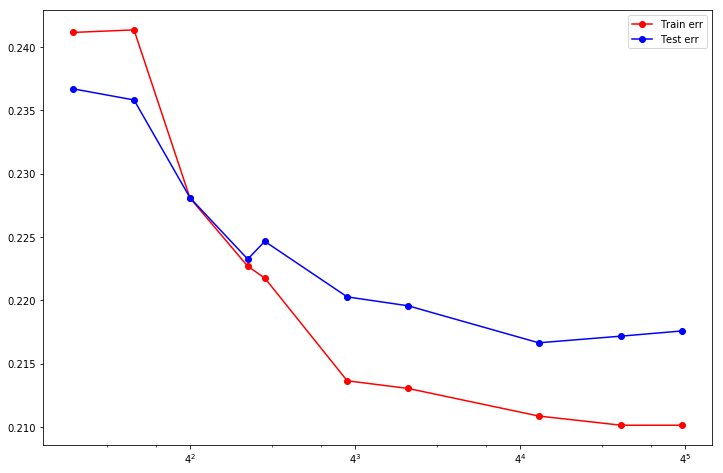

In [108]:
plot_forest_results(results_for_adaboost, n_estimators)

Здесь графики покрасивее. Кроме того интересно посмотреть что ошибки приблизительно одинаковые между собой, и приблизительно одинаковые тестовоым ошибкам предыдущих двух методов. Здесь нет речи о переобучении. Переобучение начинает появляться когда количество деревьев превышает оптимальное, но это не много по сравнению с предыдущими результатами. О недообучении ещё можно говорить, но смотря на результаты остальных методов, это наверно является приблизительно Байесовой ошибке. В общем, модель кажется прилично надёжной.

# Gradient Boosted Trees

In [109]:
def try_n_gbt(X_train, y_train, X_test, y_test, n_estimators):
    en = ensemble.GradientBoostingClassifier(n_estimators = n_estimators)
    en.fit(X_train, y_train)
    err_train = np.mean(y_train != en.predict(X_train))
    err_test = np.mean(y_test != en.predict(X_test))
    return (err_train, err_test)

In [110]:
n_estimators = [6, 10, 16, 26, 30, 60, 100, 300, 600, 1000]

results_for_gbt = [try_n_gbt(ds.X_train, ds.y_train, ds.X_test, ds.y_test, ne) \
                            for ne in n_estimators]

In [111]:
print_forest_results(results_for_gbt, n_estimators)

[(0.26726253066947075, 0.26286582160172905), (0.24518051174202593, 0.2442315555815176), (0.22955785889539831, 0.22548046030726093), (0.22347403735416355, 0.2224428997020854), (0.22214711331430576, 0.22209241193994977), (0.21213259225877523, 0.21677668088089258), (0.2079264934154524, 0.2143232665459431), (0.19981473136047267, 0.21362229102167182), (0.1923038405688248, 0.2133886325135814), (0.18654549096189474, 0.21315497400549097)]

Лучшее количество деревьев 1000, соответствующая ошибка на обучающей выборке 0.18654549096189474, тестовой 0.21315497400549097


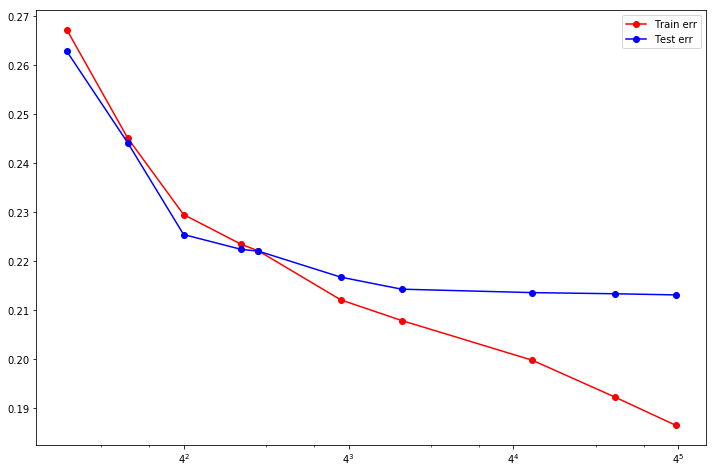

In [112]:
plot_forest_results(results_for_gbt, n_estimators)

Обучающая ошибка значительно уменьшается с повышением количества экспертов. Тестовая ошибка достигает, как обычно минимум около 0.21 и потом незначительно уменьшается. Дальше происходит переобучение, поэтому зачем платить больше (времени обучения и предсказания) за немного лучшее результаты.

# PCA - метод главных компонент

### Обработаем все оригинальные данные 

Быстро пройдём всю обработку . Сначала добавим признак класса.

In [19]:
data = orig_data
data['class'] = data.apply(group_inc, axis=1)
data = data.drop(['coninc', 'caseid', 'year', 'hispanic', 'degree', 'sei', 'income06', 'region'], axis=1)

Находим категориальные и количественые столбцы:

In [20]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']

###### Обрабатываем пропущенные значени

In [21]:
data['class'].isna().sum()

0

Хорошо что нет пропущенных значений в столбце class.

Теперь, заполним пропущённые значения количественных признаков медианами.

In [22]:
data[numerical_columns] = data[numerical_columns].fillna(data.median(axis = 0), axis = 0)

 Заполняем пропущенные категориальные значения наичаще повторяемыми.

In [23]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

###### Векторизация категориальных признаков

In [24]:
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]

for c in binary_columns:
    uniques = data[c].unique()
    data.at[data[c] == uniques[0], c] = 0
    data.at[data[c] == uniques[1], c] = 1

In [25]:
data_cat_nonbinary = pd.get_dummies(data[nonbinary_columns])

###### Нормализуем количественные признаки

In [26]:
data_numerical = data[numerical_columns]
data_num_describe = data_numerical.describe()
data_numerical = (data_numerical - data_numerical.mean(axis = 0)) / data_numerical.std(axis = 0)

###### Соединяем все в одну таблицу

In [27]:
data = pd.concat((data_numerical, data_cat_nonbinary, data[binary_columns]), axis = 1)

In [28]:
data.shape

(57061, 326)

In [29]:
data.describe()

,age,educ,paeduc,maeduc,speduc,sibs,childs,agekdbrn,granborn,class,...,abany,suicide1,suicide2,suicide3,suicide4,fear,racdif1,racdif2,racdif3,racdif4
count,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,5.706100e+04,...,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000,57061.000000
mean,-1.390973e-15,-1.145490e-14,3.390206e-14,-9.592714e-14,-7.173102e-14,5.667253e-16,6.362887e-15,8.212894e-15,-4.266087e-14,1.107614e-14,...,0.225846,0.226109,0.043410,0.044058,0.080247,0.245527,0.168767,0.060181,0.210389,0.193863
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.418142,0.418314,0.203779,0.205226,0.271678,0.430403,0.374549,0.237824,0.407588,0.395326
min,-1.587465e+00,-4.013261e+00,-2.961345e+00,-3.188790e+00,-5.422084e+00,-1.242959e+00,-1.091855e+00,-4.622366e+00,-6.066453e-01,-6.523733e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.421335e-01,-2.364960e-01,-8.041031e-01,-5.660032e-01,-1.770823e-01,-6.075631e-01,-1.091855e+00,-8.107598e-02,-6.066453e-01,-6.523733e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.541348e-01,-2.364960e-01,2.745181e-01,3.082591e-01,-1.770823e-01,-2.898651e-01,2.627741e-02,-8.107598e-02,-6.066453e-01,-6.523733e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.631967e-01,7.076953e-01,2.745181e-01,3.082591e-01,-1.770823e-01,3.455309e-01,5.853435e-01,-8.107598e-02,7.260125e-01,1.532838e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.483193e+00,2.281347e+00,2.431760e+00,2.639625e+00,3.319585e+00,2.036050e+01,3.380674e+00,1.354279e+01,2.058670e+00,1.532838e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###### X и y

In [37]:
from sklearn.preprocessing import StandardScaler

In [31]:
ss = StandardScaler(with_mean=True, with_std=False)

In [32]:
X = data.drop(('class'), axis = 1) # выбрасываем столбец 'class'
y = data['class'].astype(int)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)
real_ds = DataSet(X_train, y_train, X_test, y_test)

In [166]:
small_data = data.sample(n = 700)
print(small_data.shape)
small_X = small_data.drop(('class'), axis = 1) # выбрасываем столбец 'class'
small_y = small_data['class'].astype(int)
small_X_train, small_X_test, small_y_train, small_y_test = train_test_split(small_X, small_y, test_size = 0.5, random_state = 141)
ss.fit(small_X_train)
small_X_train = ss.transform(small_X_train)
small_X_test = ss.transform(small_X_test)
small_ds = DataSet(small_X_train, small_y_train, small_X_test, small_y_test)

(11000, 326)
0.9891721480417544


In [194]:
ds = real_ds
#ds = small_ds

### PCA для сокращения размерности пространства признаков

In [36]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [131]:
def try_n_components(n_components, pipe):
    print(n_components, end=', ')
    pipe.set_params(pca__n_components = n_components)
    pipe.fit(ds.X_train, ds.y_train)
    err_train = np.mean(ds.y_train != pipe.predict(ds.X_train))
    err_test = np.mean(ds.y_test != pipe.predict(ds.X_test))
    return (err_train, err_test)

In [132]:
pca = PCA()
# С помощью этого метода раньше получили хорошее отношение производительности и ошибки,
# и уже знаем как настроить его (и не много параметров которые могут повлиат).
en = ensemble.RandomForestClassifier(n_estimators = 600, random_state=4)
pipe = Pipeline(steps=[('pca', pca), ('en', en)])

# выборка значений количества компонент на основе опыта и неких соображений
nc_array = [1, 6, 12, 26, 38, 51, 66, 90, 170, 250, ds.X_train.shape[1]]
pipe_results = [try_n_components(nc, pipe) for nc in nc_array]
print()
print('Результаты: ')
print(pipe_results)

1, 6, 12, 26, 38, 51, 66, 90, 170, 250, 325, 
Результаты: 
[(0.10324971208251965, 0.37852678310648985), (0.0, 0.24341375080320113), (0.0, 0.22664875284771308), (0.0, 0.2151994859512822), (0.0004756897501376997, 0.21222033997312928), (0.00012518151319413148, 0.21408960803785268), (0.0001502178158329578, 0.21543314445937262), (2.5036302638826298e-05, 0.21636777849173433), (0.0, 0.22431216776680882), (0.0, 0.23021204509609206), (0.0, 0.23032887435013727)]


In [133]:
mi, _ = min(enumerate([err[1] for err in pipe_results]), key=operator.itemgetter(1))
print(f'Лучшее количество компонент {nc_array[mi]}, соответствующая ошибка на обучающей выборке {pipe_results[mi][0]}, тестовой {pipe_results[mi][1]}')

Лучшее количество компонент 38, соответствующая ошибка на обучающей выборке 0.0004756897501376997, тестовой 0.21222033997312928


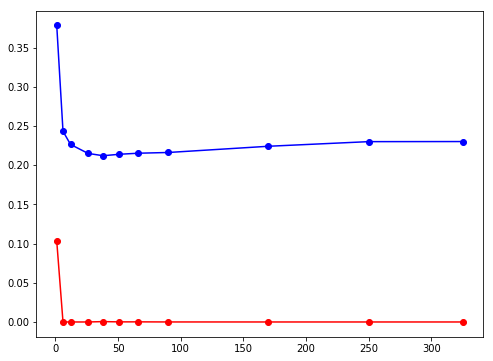

In [134]:
plt.rcParams["figure.figsize"] = [8, 6]
plt.plot(nc_array, [err[0] for err in pipe_results],
             color='red', linestyle='solid', marker='o', label='Train err')
plt.plot(nc_array, [err[1] for err in pipe_results],
             color='blue', linestyle='solid', marker='o', label='Test err')

Интересно посмотреть получим ли похожие результаты существенно отличающимся методом.

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
pca = PCA()
logistic = LogisticRegression(random_state=4, solver='lbfgs')
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# выборка значений количества компонент на основе опыта и неких соображений
nc_array = [1, 12, 26, 38, 51, 66, 90, 220, ds.X_train.shape[1]]
pipe_results = [try_n_components(nc, pipe) for nc in nc_array]
print()
print('Результаты: ')
print(pipe_results)

1, 12, 26, 38, 51, 66, 90, 220, 325, 
Результаты: 
[(0.2866656652145611, 0.28728313569717856), (0.23131040008011616, 0.23184765465272505), (0.22189675028791747, 0.22174192417781413), (0.21979370086625608, 0.2215082656697237), (0.21538731160182265, 0.21660143699982476), (0.20940363527114317, 0.21327180325953618), (0.19988984026838916, 0.2050937554763713), (0.185644184066897, 0.19376131783398562), (0.18551900255370288, 0.19387814708803083)]


Лучшее количество компонент 220, соответствующая ошибка на обучающей выборке 0.185644184066897, тестовой 0.19376131783398562


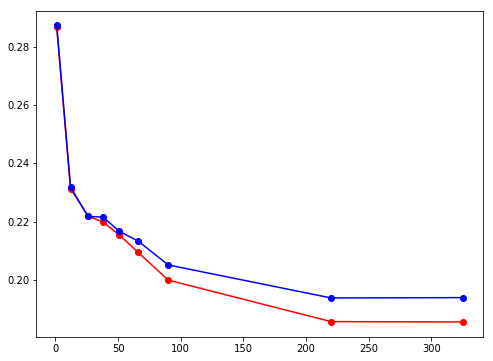

In [137]:
mi, _ = min(enumerate([err[1] for err in pipe_results]), key=operator.itemgetter(1))
print(f'Лучшее количество компонент {nc_array[mi]}, соответствующая ошибка на обучающей выборке {pipe_results[mi][0]}, тестовой {pipe_results[mi][1]}')
plt.rcParams["figure.figsize"] = [8, 6]
plt.plot(nc_array, [err[0] for err in pipe_results],
             color='red', linestyle='solid', marker='o', label='Train err')
plt.plot(nc_array, [err[1] for err in pipe_results],
             color='blue', linestyle='solid', marker='o', label='Test err')

Выглядит немножко похоже (хотя бы ошибка на обучающей выборке). Теперь имеет смысл попробовать нейронную сеть, с данным количеством компонент (она дольше обучается чем логистическая регрессия). 

Конечно, теперь может быть другие гиперпараметры дадут лучший результат, но свё таки интересно посмотреть что получится.
Прежние гиперпараметры: количество нейронов 73 и альфа 5.623413251903491, при количестве признаков (не главных компонент) 73.

In [138]:
pca = PCA()
nn = MLPClassifier(alpha =  5.623413251903491, hidden_layer_sizes = (73,),
                   solver = 'lbfgs', activation = 'logistic', random_state = 4)
pipe = Pipeline(steps=[('pca', pca), ('nn', nn)])

# выборка значений количества компонент на основе опыта с маленкой выборкой
nc_array = [1, 12, 26, 38, 51, 56, 66, 76, 90, 220, ds.X_train.shape[1]]
pipe_results = [try_n_components(nc, pipe) for nc in nc_array]
print()
print('Результаты: ')
print(pipe_results)


1, 12, 26, 38, 51, 56, 66, 76, 90, 220, 325, 
Результаты: 
[(0.2870161734515047, 0.2869326479350429), (0.215913073957238, 0.21917168058881945), (0.19826248059686546, 0.20743034055727555), (0.1877221971859196, 0.2017641217360827), (0.17933503580191276, 0.19691570769320638), (0.17958539882830105, 0.19814241486068113), (0.17397726703720395, 0.1980255856066359), (0.1687947523909669, 0.19755826859045506), (0.16907015171999398, 0.19387814708803083), (0.14626208001602323, 0.2007126584496758), (0.1469881327925492, 0.19878497575792978)]


Лучшее количество компонент 90, соответствующая ошибка на обучающей выборке 0.16907015171999398, тестовой 0.19387814708803083


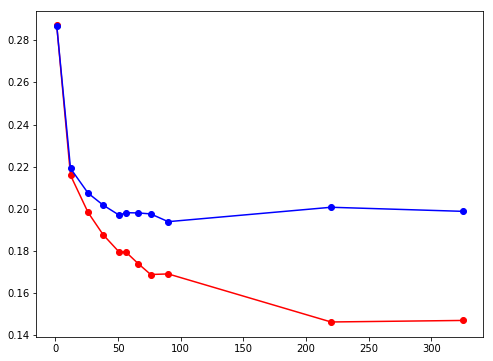

In [139]:
mi, _ = min(enumerate([err[1] for err in pipe_results]), key=operator.itemgetter(1))
print(f'Лучшее количество компонент {nc_array[mi]}, соответствующая ошибка на обучающей выборке {pipe_results[mi][0]}, тестовой {pipe_results[mi][1]}')
plt.rcParams["figure.figsize"] = [8, 6]
plt.plot(nc_array, [err[0] for err in pipe_results],
             color='red', linestyle='solid', marker='o', label='Train err')
plt.plot(nc_array, [err[1] for err in pipe_results],
             color='blue', linestyle='solid', marker='o', label='Test err')

Весь ноутбук я запустил ёще раз. Я знал что результаты могут отличаться из-за случайности, но цель была посмотреть графики и попытаться привести выводы на их основе, а не найти ошибки до точности одной 10000ой. Поэтому (и для экономии времени) не использовал GridSearchCV. Действительно, ошибки не отличались, либо отличались совсем незначительно. Наглядно графики не отличались вообще. Только один результат отличался. При первом запуске для PCA и нейронной сети  получились следующие результаты: Лучшее количество компонент 76, соответствующая ошибка на обучающей выборке 0.17159881828651544, тестовой 0.1936444885799404. И в данном случае график, наглядно, не отличается. Можно увидеть, что действительно, между 51 и 90 компонент, есть большие колебания. Но всё таки, чтобы найти лучшее количество главных компонент, придётся использовать GridSearchCV, и попробовать все значения  главных компонент.

Используем  PCA  для визуализации в двухмерном пространстве.

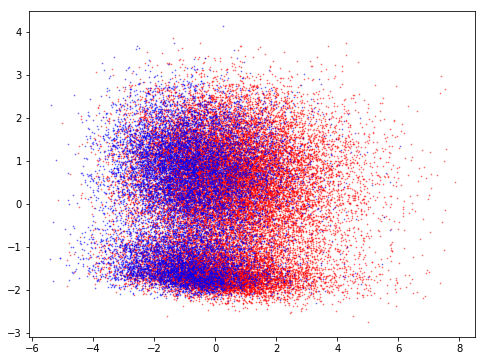

In [142]:
pca = PCA(n_components=2)
pca.fit(ds.X_train)
Xtsf = pca.transform(ds.X_train)

Xclass0 = Xtsf[ds.y_train == 0]
Xclass1 = Xtsf[ds.y_train == 1]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(Xclass0[:,0], Xclass0[:,1], c='red', label='<50k', alpha = 0.5, s=0.5)
ax.scatter(Xclass1[:,0], Xclass1[:,1], c='blue', label='>=50k', alpha=0.5, s=0.5)

Может быть в 3Д пространстве их можно легче отделить.

In [143]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

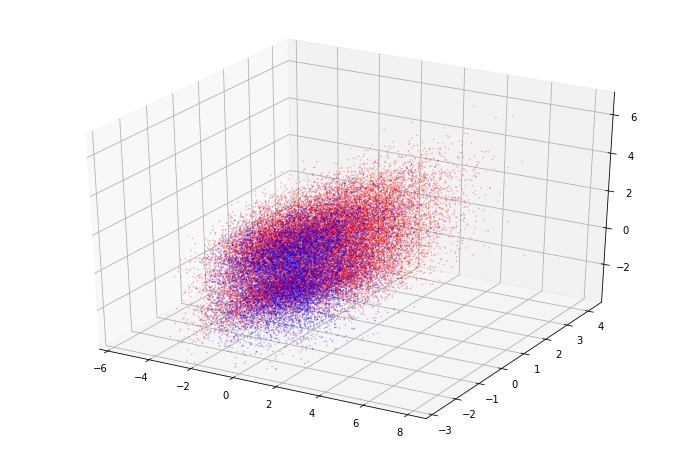

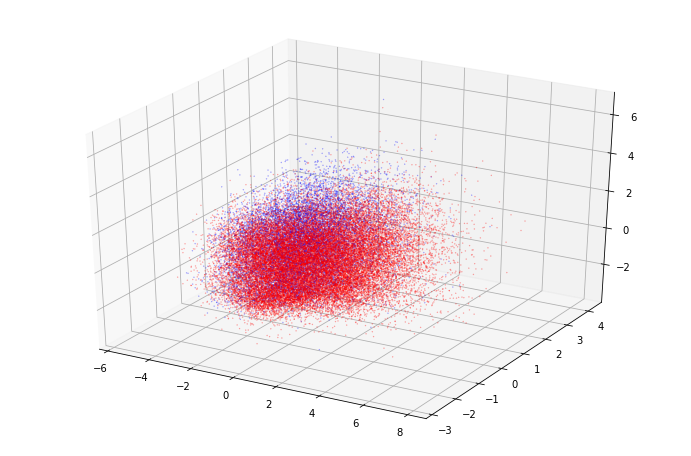

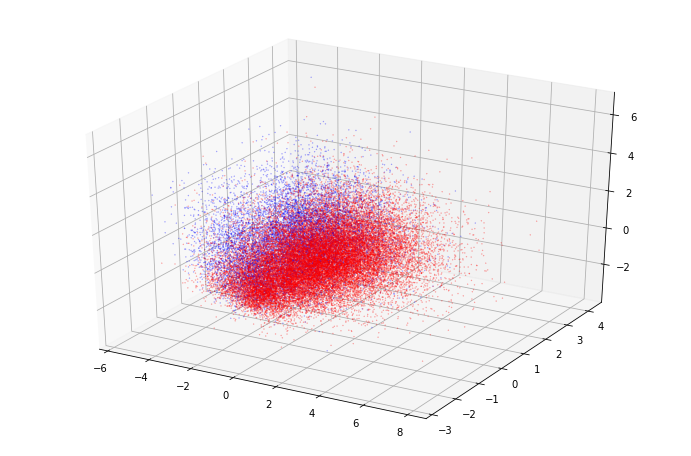

In [148]:
pca = PCA(n_components=3)
pca.fit(ds.X_train)
Xtsf = pca.transform(ds.X_train)

Xclass0 = Xtsf[ds.y_train == 0]
Xclass1 = Xtsf[ds.y_train == 1]

plt.rcParams["figure.figsize"] = [12, 8]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(Xclass0[:,0], Xclass0[:,1], Xclass0[:,2], c='red', label='<50k', alpha = 0.5, zdir='x', s=0.1)
ax.scatter(Xclass1[:,0], Xclass1[:,1], Xclass1[:,2], c='blue', label='>=50k', alpha=0.5, zdir='x', s=0.1)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(Xclass0[:,0], Xclass0[:,1], Xclass0[:,2], c='red', label='<50k', alpha = 0.5, zdir='y', s=0.1)
ax.scatter(Xclass1[:,0], Xclass1[:,1], Xclass1[:,2], c='blue', label='>=50k', alpha=0.5, zdir='y', s=0.1)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(Xclass0[:,0], Xclass0[:,1], Xclass0[:,2], c='red', label='<50k', alpha = 0.5, zdir='z', s=0.1)
ax.scatter(Xclass1[:,0], Xclass1[:,1], Xclass1[:,2], c='blue', label='>=50k', alpha=0.5, zdir='z', s=0.1)

Сейчас наглядно понятно почему нам нужно многомерное пространство.

Кажется тут очень много неустранимого шума. Но может быть машина опорных векторов с гауссовским ядром хорошо решает данную проблему. Попробуем ещё и стандартизовать данные, и уменьшить шум отчисляя главные компоненты так чтобы осталось 99% начальной дисперсии. Сначала найдём лучшее С, потом к ему подгоним лучшее гамма. Таким образом не получим так хорошие результаты как с помощью GridSearchCV, или так как делали с нейронными сетями. Но быстро получим ответ на вопрос, может ли SVM значительно уменьшить ошибку.  

In [195]:
from sklearn.svm import SVC

In [196]:
ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(ds.X_train)
ds = DataSet(ss.transform(ds.X_train), ds.y_train, ss.transform(ds.X_test), ds.y_test)
pca = PCA(n_components = ds.X_train.shape[1])
pca.fit(ds.X_train)
exvar = 0
n_comp_choice = 0
for i in range(0, ds.X_train.shape[1]-1):
    exvar = exvar + pca.explained_variance_ratio_[i]
    if exvar > 0.99:
        n_comp_choice = i + 1
        break
print(exvar, n_comp_choice)

0.9908129488140234 237


In [197]:
def try_C(svc, C, ds):
    print(C, end=", ")
    svc.set_params(C=C)
    svc.fit(ds.X_train, ds.y_train)
    err_train = np.mean(ds.y_train != svc.predict(ds.X_train))
    err_test  = np.mean(ds.y_test  != svc.predict(ds.X_test))
    return (err_train, err_test)


In [198]:
pca = PCA(n_components = n_comp_choice)
pca.fit(ds.X_train)
Cs = 10.**np.arange(-4, 4)
gamma_array = 10.**np.arange(-5, 2)
svc = SVC(kernel='rbf')
trns_ds = DataSet(pca.transform(ds.X_train), ds.y_train, pca.transform(ds.X_test), ds.y_test)
trns_ds = DataSet(ds.X_train, ds.y_train, ds.X_test, ds.y_test)

In [199]:
csresults = [try_C(svc, C, trns_ds) for C in Cs]
print(csresults)

0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, [(0.29908367132341895, 0.29727203691804427), (0.29908367132341895, 0.29727203691804427), (0.29888338090230837, 0.2969215491559086), (0.18957488358119273, 0.20153046322799228), (0.10562816083320815, 0.19230095215842047), (0.009889339542336388, 0.21093521817863192), (0.0005257623554153522, 0.22904375255563994), (0.0, 0.23108826450143116)]


In [200]:
mci, _ = min(enumerate([t for _, t in csresults]), key=operator.itemgetter(1))
print(f'Лучшее C={Cs[mci]}, соответствующая ошибка на обучающей выборке {csresults[mci][0]}, тестовой {csresults[mci][1]}')

Лучшее C=1.0, соответствующая ошибка на обучающей выборке 0.10562816083320815, тестовой 0.19230095215842047


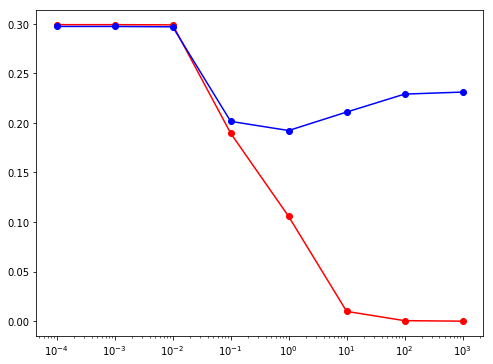

In [201]:
plt.rcParams["figure.figsize"] = [8, 6]
axes = plt.gca()
axes.set_xscale('log', basex=10)
plt.plot(Cs, [err[0] for err in csresults],
             color='red', linestyle='solid', marker='o', label='Train err')
plt.plot(Cs, [err[1] for err in csresults],
             color='blue', linestyle='solid', marker='o', label='Test err')

In [202]:
svc.set_params(C=Cs[mci])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [203]:
def try_gamma(svc, gamma, ds):
    print(gamma, end=", ")
    svc.set_params(gamma=gamma)
    svc.fit(ds.X_train, ds.y_train)
    err_train = np.mean(ds.y_train != svc.predict(ds.X_train))
    err_test  = np.mean(ds.y_test  != svc.predict(ds.X_test))
    return (err_train, err_test)

In [204]:
gammaresults = [try_gamma(svc, gamma, trns_ds) for gamma in gamma_array]
print(gammaresults)

1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, [(0.2626558509839267, 0.26082130965593786), (0.19435681738520855, 0.19697412232022898), (0.16551499674528067, 0.19084058648285532), (0.020930349006058786, 0.2142648519189205), (0.0, 0.29721362229102166), (0.0, 0.29727203691804427), (0.0, 0.29727203691804427)]


In [205]:
mgi, _ = min(enumerate([t for _, t in gammaresults]), key=operator.itemgetter(1))
print(f'Лучшее gamma={gamma_array[mgi]}, соответствующая ошибка на обучающей выборке {gammaresults[mgi][0]}, тестовой {gammaresults[mgi][1]}')

Лучшее gamma=0.001, соответствующая ошибка на обучающей выборке 0.16551499674528067, тестовой 0.19084058648285532


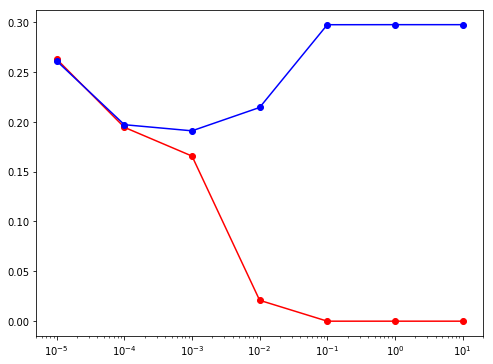

In [206]:
plt.rcParams["figure.figsize"] = [8, 6]
axes = plt.gca()
axes.set_xscale('log', basex=10)
plt.plot(gamma_array, [err[0] for err in gammaresults],
             color='red', linestyle='solid', marker='o', label='Train err')
plt.plot(gamma_array, [err[1] for err in gammaresults],
             color='blue', linestyle='solid', marker='o', label='Test err')

Кажется что надежды нет и что действительно Байесова ошибка около 18%. Наверно нужно ещё независимых и хорошо предсказующих признаков.